<br>
<br>
<br>
<div style="text-align: center;">
  <img src="Images/Finetuned.jpg" alt="Finetuned">
</div>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


<div style="text-align: center;">
  <img src="Images/Fewshot.jpg" alt="Fewshot">
</div>
<br>
<br>
<br><br>
<br>
<br><br>
<br>
<br><br>
<br><br>
<br>
<br>
<br>

# Few-Shot Learning: Introduction

**What is Few-Shot Learning?**

Traditional supervised learning relies on large datasets with many labeled examples per class. In contrast, **few-shot learning (FSL)** aims to learn new concepts from **very few labeled examples**, sometimes as few as 1–5 per class. 

## Why Few-Shot Learning Is Useful

Few-shot learning is designed for scenarios where standard supervised learning is impractical or inefficient. 
Below are the main reasons why few-shot methods are important in real-world machine learning systems.

---

### 1. Data Is Expensive or Hard to Collect

In many domains, collecting large labeled datasets is not feasible.

Examples:
- **Medical imaging:** Labeling an image may require a trained radiologist or pathologist.
- **Rare diseases:** There may be only a handful of available patient cases.
- **Wildlife monitoring:** Some species are rare, endangered, or difficult to photograph.
- **Industrial defects:** Failures are rare by definition, so examples are scarce.

In such settings:
- Collecting thousands of labeled examples per class is unrealistic.
- Traditional deep learning models overfit when trained on very small datasets.

Few-shot learning addresses this by:
- Relying on **prior knowledge learned from other data**
- Requiring only a few labeled examples to recognize a new class

**The key assumption is that the model has already learned *how to represent the domain*, 
and the few examples only specify what is new.**

---

### 2. Rapid Adaptation to New Tasks Is Needed

In many applications, new categories appear frequently and models must adapt quickly.

Examples:
- **Personalized systems:** A model adapts to a new user's preferences.
- **Security systems:** New attack patterns or anomalies appear.
- **Robotics:** A robot encounters new objects or environments.
- **Content moderation:** New types of content or trends emerge.

In these cases:
- Retraining a large model from scratch is slow and computationally expensive.
- Collecting large datasets for each new task is impractical.

Few-shot learning allows:
- Adding new classes using only a few examples
- Avoiding full retraining of the model
- Near-instant adaptation at deployment time

This makes few-shot learning suitable for **on-the-fly learning**.

---

### 3. Leveraging Pre-Existing Knowledge Efficiently

Few-shot learning is built on the idea that models should reuse what they already know.

Modern machine learning models are often:
- Pretrained on massive datasets
- Rich in general-purpose representations

Examples:
- Vision models pretrained on ImageNet
- Language models pretrained on large text corpora
- Speech models pretrained on large audio datasets

Few-shot learning leverages this by:
- Keeping the pretrained representation fixed
- Using a small number of examples to define new tasks in that representation space

Instead of learning from scratch:
- The model uses similarity, distance, or contextual cues
- Knowledge transfers from old tasks to new ones

This leads to:
- Better generalization
- Lower data requirements
- More efficient use of computational resources

---

### Summary

Few-shot learning is useful when:
- Large labeled datasets are unavailable
- Fast adaptation is required

In short, few-shot learning shifts the focus from *learning from data* to *using knowledge effectively*.


---

**Key Concepts**

- **N-way K-shot learning:**  
  - **N** = number of classes to classify  
  - **K** = number of labeled examples per class  
  Example: 5-way 1-shot = classify among 5 classes, 1 labeled example per class  

- **Support Set:** the small labeled dataset used for learning  
- **Query Set:** the dataset of new/unseen examples to classify  

- **Metric-Based Learning:**  
  Many few-shot methods rely on comparing embeddings of examples.  
  - **Prototypical Networks:** compute a "prototype" for each class by averaging support embeddings.  
  - Classify a query sample based on nearest prototype in embedding space.  
  - Advantages: simple, intuitive, often works well with pre-trained embeddings.  

**Intuition:**  
Imagine a 2D plot where points represent features of examples:
- Points from the same class cluster together
- Prototypes are the "center" of each cluster
- New points are classified based on proximity to these centers


# Metric-Based Few-Shot Learning

**Goal:**  
Classify new examples when you have **very few labeled examples per class**. Instead of training a full classifier from scratch, you learn a **feature space (embedding space)** where you can measure similarity between examples.

---

## Key Idea

1. **Embed all examples into a feature space**  
   - A neural network (or other function) maps each input $x$ to an embedding $f(x)$.  
   - Ideally, embeddings of the **same class are close**, and embeddings of **different classes are far apart**.

2. **Compute a "prototype" for each class**  
   - For each class $c$, compute the **average embedding** of the support examples:  
     
     $$
     \mathbf{p}_c = \frac{1}{K} \sum_{i=1}^{K} f(x_i^c)
     $$
     
     where $x_i^c$ is the $i$-th support example of class $c$, and $K$ is the number of support examples per class.  
   - Think of this as the **center of the cluster** in embedding space.

3. **Classify query examples**  
   - For a new (query) example $x_q$, compute its embedding $f(x_q)$.  
   - Measure the distance to each prototype (usually **Euclidean** or **cosine similarity**).  
   - Assign $x_q$ to the class of the **nearest prototype**.

---

## Intuition / Visualization

- Imagine a 2D plot:  
  - Each point = an example  
  - Points from the same class cluster together  
  - Prototypes = black stars at the center of each cluster  
  - Query points = classified by "nearest star"  

- Even with **just 1-5 examples per class**, if the embedding space is well-structured, you can classify correctly.

---

## Why Metric-Based Works in Few-Shot Learning

1. **No need to retrain a large classifier** – you just compare distances.  
2. **Leverages learned feature representations** – you can pretrain the embedding network on other data.  
3. **Scalable to new classes** – adding a new class is just computing its prototype; no extra training.  

---

## Examples of Metric-Based Approaches

- **Prototypical Networks:** use the mean embedding as the prototype.  
- **Matching Networks:** compare query embeddings to all support embeddings with attention-weighted similarity.
- **Siamese Networks:** learn a network that directly predicts if two examples are from the same class (distance learning).  


---

**In short:** Metric-based few-shot learning is **“learn a good embedding space, then classify by distance”**.


**Prototypical Networks** examples:

Synthetic data example:

In [25]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F


torch.manual_seed(42)

n_way = 4       # number of classes
k_shot = 5      # support examples per class
n_query = 5     # query examples per class


support_x = []
support_y = []
query_x = []
query_y = []

class_centers = torch.randn(n_way, 2) * 4

for c in range(n_way):
    support_x.append(torch.randn(k_shot, 2) + class_centers[c])
    support_y.append(torch.full((k_shot,), c))
    
    query_x.append(torch.randn(n_query, 2) + class_centers[c])
    query_y.append(torch.full((n_query,), c))

support_x = torch.cat(support_x, dim=0)
support_y = torch.cat(support_y, dim=0)
query_x = torch.cat(query_x, dim=0)
query_y = torch.cat(query_y, dim=0)

all_x = torch.cat([support_x, query_x], dim=0)
all_y = torch.cat([support_y, query_y], dim=0)

In [26]:
# Normally this would be a pretrained embedding network (e.g. ResNet, ViT, DINO)
class SimpleEmbed(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

model = SimpleEmbed()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [27]:
# Training loop (Prototypical learning)
for epoch in range(500):
    optimizer.zero_grad()
    
    embeds = model(all_x)
    support_embeds = embeds[:n_way * k_shot]
    query_embeds = embeds[n_way * k_shot:]
    
    # Compute prototypes
    prototypes = []
    for c in range(n_way):
        class_embeds = support_embeds[support_y == c]
        prototypes.append(class_embeds.mean(dim=0))
    prototypes = torch.stack(prototypes)
    
    dists = torch.cdist(query_embeds, prototypes)
    loss = F.cross_entropy(-dists, query_y)
    
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluation
with torch.no_grad():
    embeds = model(all_x)
    support_embeds = embeds[:n_way * k_shot]
    query_embeds = embeds[n_way * k_shot:]
    
    prototypes = torch.stack([
        support_embeds[support_y == c].mean(dim=0)
        for c in range(n_way)
    ])
    
    dists = torch.cdist(query_embeds, prototypes)
    preds = dists.argmin(dim=1)
    acc = (preds == query_y).float().mean()
    print(f"Few-shot accuracy: {acc.item():.2f}")

Epoch 0, Loss: 1.1443
Epoch 100, Loss: 0.2642
Epoch 200, Loss: 0.2302
Epoch 300, Loss: 0.1964
Epoch 400, Loss: 0.0839
Few-shot accuracy: 1.00


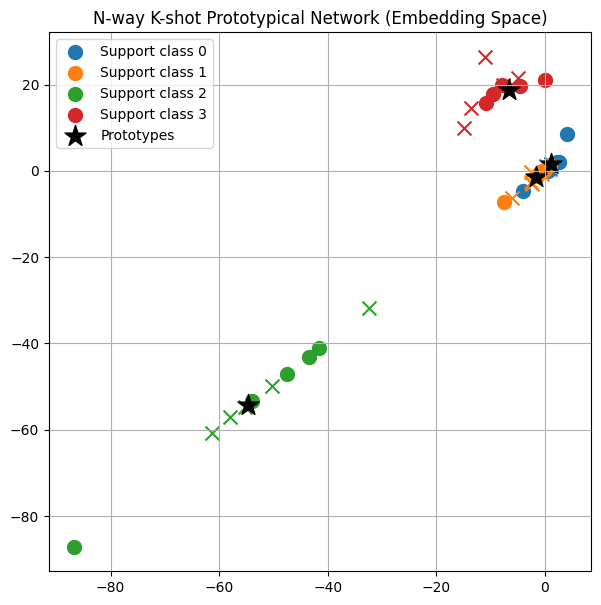

In [28]:
plt.figure(figsize=(7, 7))
colors = plt.cm.tab10.colors

for c in range(n_way):
    idx = support_y == c
    plt.scatter(
        support_embeds[idx, 0],
        support_embeds[idx, 1],
        color=colors[c],
        label=f"Support class {c}",
        s=100
    )
    
    qidx = query_y == c
    plt.scatter(
        query_embeds[qidx, 0],
        query_embeds[qidx, 1],
        color=colors[c],
        marker="x",
        s=100
    )

plt.scatter(
    prototypes[:, 0],
    prototypes[:, 1],
    color="black",
    marker="*",
    s=250,
    label="Prototypes"
)

plt.legend()
plt.title("N-way K-shot Prototypical Network (Embedding Space)")
plt.grid(True)
plt.show()


In [ ]:
Real-life data example:

In [41]:
# Real-life example
# Few-Shot Learning: Before vs After
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
import random
from collections import defaultdict

torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"

n_way = 4
k_shot = 5
n_query = 5


transform = T.Compose([
    T.Resize(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified


/home/milosz/.venv/lib/python3.13/site-packages/torchvision/datasets/cifar.py:94: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  entry = pickle.load(fo, encoding='latin1')


In [42]:
class_to_indices = defaultdict(list)
for idx, (_, label) in enumerate(dataset):
    class_to_indices[label].append(idx)

selected_classes = random.sample(list(class_to_indices.keys()), n_way)

support_x, support_y = [], []
query_x, query_y = [], []

for c_idx, c in enumerate(selected_classes):
    indices = random.sample(class_to_indices[c], k_shot + n_query)
    for i in indices[:k_shot]:
        img, _ = dataset[i]
        support_x.append(img)
        support_y.append(c_idx)
    for i in indices[k_shot:]:
        img, _ = dataset[i]
        query_x.append(img)
        query_y.append(c_idx)

support_x = torch.stack(support_x).to(device)
query_x = torch.stack(query_x).to(device)
support_y = torch.tensor(support_y).to(device)
query_y = torch.tensor(query_y).to(device)

In [43]:
# PRE few-shot: "random guessing"

random_preds = torch.randint(0, n_way, (len(query_y),), device=device)
acc_random = (random_preds == query_y).float().mean().item()

# Embedding network (pretrained on ImageNet)
backbone = torchvision.models.resnet18(pretrained=True)
backbone.fc = nn.Identity()
backbone = backbone.to(device)
backbone.eval()

# POST few-shot: prototypical classification
with torch.no_grad():
    support_embeds = backbone(support_x)
    query_embeds = backbone(query_x)

prototypes = torch.stack([
    support_embeds[support_y == c].mean(dim=0)
    for c in range(n_way)
])

dists = torch.cdist(query_embeds, prototypes)
proto_preds = dists.argmin(dim=1)
acc_proto = (proto_preds == query_y).float().mean().item()


In [44]:
print("Few-Shot Learning Performance Comparison")
print("----------------------------------------")
print(f"N-way: {n_way}, K-shot: {k_shot}, Queries/class: {n_query}")
print()
print(f"Before few-shot (random guessing): {acc_random:.2f}")
print(f"After few-shot (prototypical):     {acc_proto:.2f}")
print()
print("Gain from few-shot learning: "
      f"{acc_proto - acc_random:+.2f}")


Few-Shot Learning Performance Comparison
----------------------------------------
N-way: 4, K-shot: 5, Queries/class: 5

Before few-shot (random guessing): 0.20
After few-shot (prototypical):     0.65

Gain from few-shot learning: +0.45


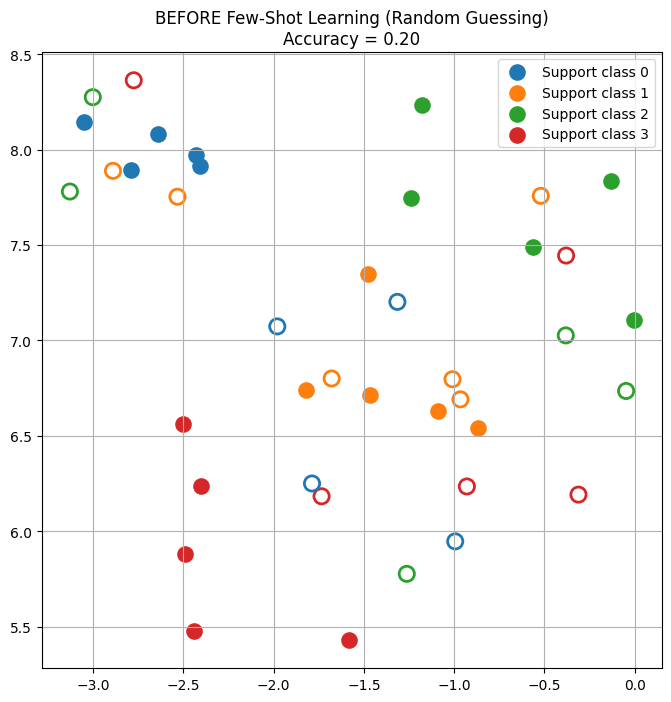

In [45]:
# t-SNE Visualization: BEFORE Few-Shot 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

all_embeds = torch.cat([support_embeds, query_embeds, prototypes]).cpu()

tsne = TSNE(n_components=2, random_state=42)
all_2d = tsne.fit_transform(all_embeds)

support_2d = all_2d[:len(support_embeds)]
query_2d   = all_2d[len(support_embeds):len(support_embeds)+len(query_embeds)]
proto_2d   = all_2d[-len(prototypes):]

colors = plt.cm.tab10.colors
n_way = prototypes.shape[0]

plt.figure(figsize=(8, 8))

# Support points (true classes) - filled circles
for c in range(n_way):
    plt.scatter(
        support_2d[support_y.cpu() == c, 0],
        support_2d[support_y.cpu() == c, 1],
        color=colors[c],
        label=f"Support class {c}",
        s=120
    )

# Query points colored by RANDOM prediction - 
for i in range(len(query_2d)):
    plt.scatter(
        query_2d[i, 0],
        query_2d[i, 1],
        facecolors='none',
        edgecolors=colors[random_preds[i].item()],
        s=120,
        linewidths=2
    )

plt.title(f"BEFORE Few-Shot Learning (Random Guessing)\nAccuracy = {acc_random:.2f}")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_70011/154627874.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


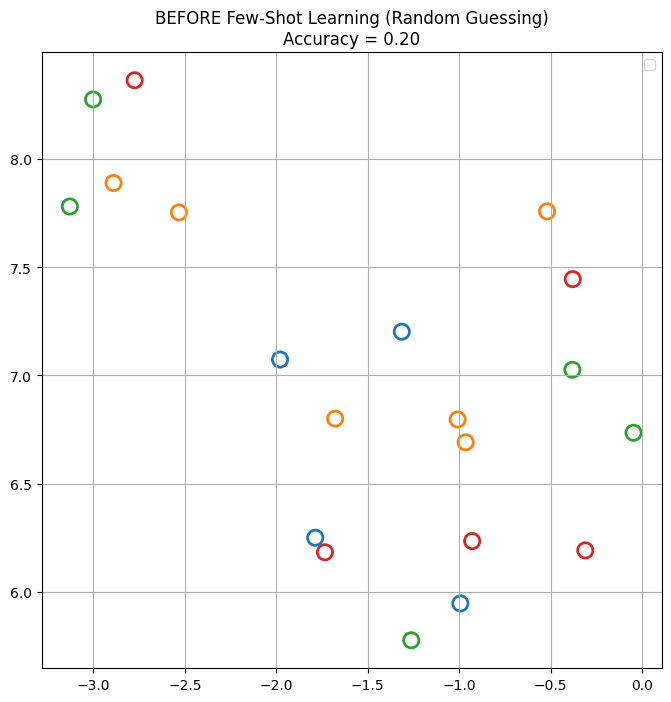

In [46]:
plt.figure(figsize=(8, 8))

# Query points colored by RANDOM prediction - rings
for i in range(len(query_2d)):
    plt.scatter(
        query_2d[i, 0],
        query_2d[i, 1],
        facecolors='none',
        edgecolors=colors[random_preds[i].item()],
        s=120,
        linewidths=2
    )

plt.title(f"BEFORE Few-Shot Learning (Random Guessing)\nAccuracy = {acc_random:.2f}")
plt.legend()
plt.grid(True)
plt.show()

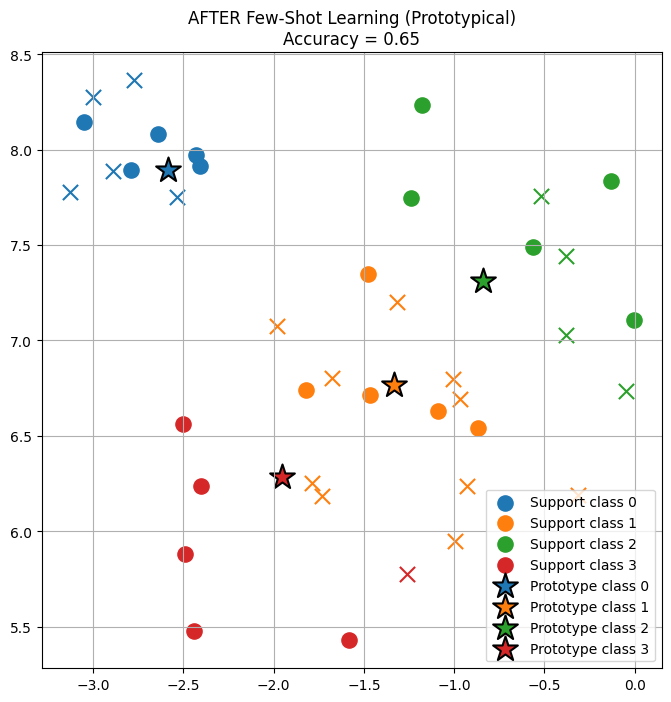

In [47]:
# t-SNE Visualization: AFTER Few-Shot (Prototypical Classification)
plt.figure(figsize=(8, 8))

# Support points - filled circles
for c in range(n_way):
    plt.scatter(
        support_2d[support_y.cpu() == c, 0],
        support_2d[support_y.cpu() == c, 1],
        color=colors[c],
        label=f"Support class {c}",
        s=120
    )

# Query points colored by PROTOTYPICAL prediction - x-es
for i in range(len(query_2d)):
    plt.scatter(
        query_2d[i, 0],
        query_2d[i, 1],
        marker='x',
        color=colors[proto_preds[i].item()],
        s=120
    )

# Prototypes (colored by class) - stars
for c in range(n_way):
    plt.scatter(
        proto_2d[c, 0],
        proto_2d[c, 1],
        color=colors[c],
        marker='*',
        s=350,
        edgecolor='k',  # optional: black edge to stand out
        linewidth=1.5,
        label=f'Prototype class {c}'
    )

plt.title(f"AFTER Few-Shot Learning (Prototypical)\nAccuracy = {acc_proto:.2f}")
plt.legend()
plt.grid(True)
plt.show()


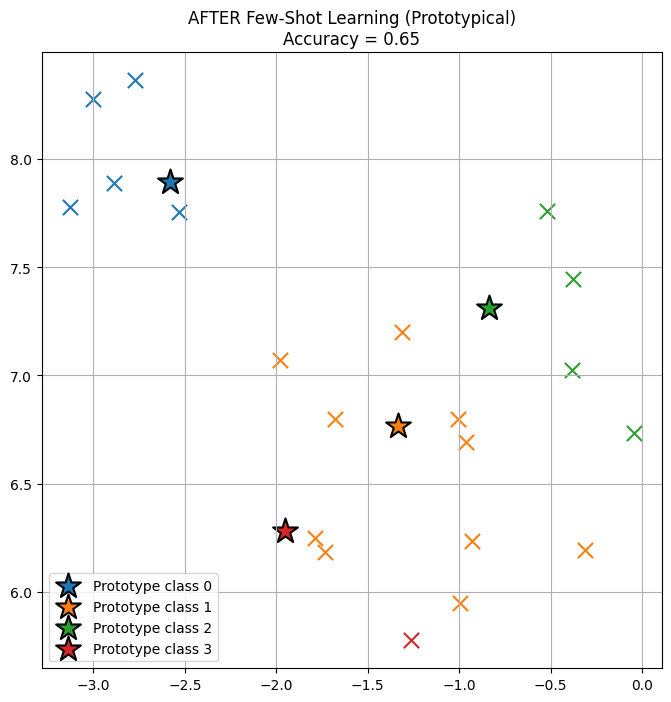

In [48]:
# t-SNE Visualization: AFTER Few-Shot (Prototypical Classification)
plt.figure(figsize=(8, 8))

# Query points colored by PROTOTYPICAL prediction - x-es
for i in range(len(query_2d)):
    plt.scatter(
        query_2d[i, 0],
        query_2d[i, 1],
        marker='x',
        color=colors[proto_preds[i].item()],
        s=120
    )

# Prototypes (colored by class) - stars
for c in range(n_way):
    plt.scatter(
        proto_2d[c, 0],
        proto_2d[c, 1],
        color=colors[c],
        marker='*',
        s=350,
        edgecolor='k',  # black edge to stand out
        linewidth=1.5,
        label=f'Prototype class {c}'
    )

plt.title(f"AFTER Few-Shot Learning (Prototypical)\nAccuracy = {acc_proto:.2f}")
plt.legend(loc='lower left')  # move legend to lower right corner
plt.grid(True)
plt.show()


**Exercise 1**

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(42)

n_way = 3
k_shot = 5
n_query = 5


support_x = []
support_y = []
query_x = []
query_y = []

class_centers = torch.randn(n_way, 2) * 4

for c in range(n_way):
    support_x.append(torch.randn(k_shot, 2) + class_centers[c])
    support_y.append(torch.full((k_shot,), c))

    query_x.append(torch.randn(n_query, 2) + class_centers[c])
    query_y.append(torch.full((n_query,), c))

support_x = torch.cat(support_x, dim=0)
support_y = torch.cat(support_y, dim=0)
query_x = torch.cat(query_x, dim=0)
query_y = torch.cat(query_y, dim=0)


class SimpleEmbed(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.net(x)


model = SimpleEmbed()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# --------------------------
# Training loop
# --------------------------
for epoch in range(200):
    optimizer.zero_grad()

    # --------------------------
    # TODO 1: Compute embeddings
    # --------------------------
    support_embeds = None
    query_embeds = None

    # --------------------------
    # TODO 2: Compute prototypes
    # --------------------------
    prototypes = None

    # --------------------------
    # TODO 3: Compute loss
    # --------------------------
    dists = None
    loss = None

    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


# --------------------------
# TODO 4: Compute loss
# --------------------------
with torch.no_grad():
    support_embeds = None
    query_embeds = None

    prototypes = None

    dists = None
    preds = None
    acc = None

print(f"Few-shot accuracy: {acc:.2f}")


AttributeError: 'NoneType' object has no attribute 'backward'

## Matching Networks: Attention over Support Set

Matching Networks are a few-shot learning approach that extends the ideas of Prototypical Networks by comparing each query example to **all support examples** rather than computing a single prototype per class. This allows the model to capture more detailed relationships in the support set, which can be especially helpful when classes are diverse or have complex distributions.

### Key Ideas

- **Support Set Comparison:**  
  Each query embedding is compared to **every support embedding** using a similarity function (e.g., cosine similarity or dot product).

- **Attention-Weighted Prediction:**  

  In Matching Networks, a query is compared to **all support examples**. The prediction is a **weighted sum of the support labels**, where the weights are determined by similarity to the query.

  Let $q$ be a query example and $S = \{(x_i, y_i)\}$the support set. Then the predicted label is:

  $$
  \hat{y}_q = \sum_{i \in S} a(q, x_i) \, y_i
  $$

  The attention weights $a(q, x_i)$ are computed as a softmax over similarities:

  $$
  a(q, x_i) = \frac{\exp(\text{sim}(f(q), f(x_i)))}{\sum_{j \in S} \exp(\text{sim}(f(q), f(x_j)))} \,,
  $$

  where:  
  - $f(\cdot)$ is the embedding function (e.g., CNN).  
  - $\text{sim}(\cdot, \cdot)$ is a similarity function (commonly **cosine similarity** or **dot product**).  
  - $y_i$ is the label of support example $x_i$ (usually one-hot encoded).  

  This allows the query to **attend to the most relevant support examples**, weighting their influence in the final prediction.


- **Contextual Embeddings (Optional Advanced):**  
  In the original Matching Networks paper, embeddings can be **contextualized** using a BiLSTM over the support set. This allows each embedding to depend on the rest of the support set, potentially improving performance.

### Comparison with Prototypical Networks

| Feature | Prototypical Network | Matching Network |
|---------|--------------------|----------------|
| Class Representation | Prototype (mean) | All support points |
| Query Comparison | Query ↔ Prototype | Query ↔ All support embeddings (attention) |
| Flexibility | Limited to class mean | Can handle heterogeneous or overlapping classes better |
| Complexity | Lower | Higher (more pairwise computations) |

### Advantages of Matching Networks

- Captures finer-grained information from the support set.
- Can adapt better when class distributions are complex.
- Visualizable attention weights provide insight into which support points influence predictions.

### Applications

- Synthetic datasets for teaching few-shot concepts.
- Pretrained CNN embeddings for real datasets like CIFAR-10.
- Useful baseline to compare with Prototypical Networks and other metric-based few-shot methods.


# Meta-Learning Methods: Learning to Learn

W poprzednich sekcjach poznaliśmy metody metric-based (Prototypical Networks, Matching Networks), które uczą się **dobrej przestrzeni embeddingów** i klasyfikują nowe przykłady przez porównywanie odległości.

W tej sekcji poznamy podejście **meta-learning**, które idzie o krok dalej: zamiast uczyć się tylko reprezentacji, uczymy się **jak szybko adaptować model do nowego zadania**.

---

## Czym jest Meta-Learning?

**Meta-learning** (uczenie się uczenia) to podejście, w którym model uczy się **algorytmu uczenia** lub **dobrej inicjalizacji wag**, tak aby po zobaczeniu kilku przykładów z nowego zadania mógł się szybko zaadaptować.

**Kluczowa różnica:**
- **Metric-based FSL:** Uczymy embeddingi → porównujemy odległości → brak zmiany wag podczas inference
- **Meta-learning:** Uczymy inicjalizację → kilka kroków gradient descent → wagi się zmieniają dla każdego nowego zadania

---

## Podstawowe pojęcia

### Task / Episode
- **Task (zadanie):** Jeden problem few-shot, np. klasyfikacja 3 klas po 5 przykładów każda
- **Episode:** Jedna iteracja treningowa, w której losujemy nowy task

### Inner Loop (pętla wewnętrzna)
- Adaptacja modelu do **konkretnego taska**
- Kilka kroków gradient descent na support set
- Wagi modelu są **tymczasowo** modyfikowane

### Outer Loop (pętla zewnętrzna)
- Aktualizacja **meta-parametrów** (inicjalizacji)
- Optymalizujemy tak, aby po inner loop model dobrze działał na query set
- To jest "uczenie się jak się uczyć"

---

## Intuicja

Wyobraź sobie, że szukasz **punktu startowego w przestrzeni wag**, z którego:
- Po kilku krokach w dowolnym kierunku (różne taski)
- Zawsze dojdziesz do dobrego rozwiązania

Meta-learning znajduje taki "uniwersalny" punkt startowy.

## Problem, który rozwiązuje Meta-Learning

### Kiedy metric-based nie wystarcza?

Metody oparte na metrykach (ProtoNet, Matching Networks) działają świetnie, gdy:
- Pretrenowany encoder tworzy dobre embeddingi
- Klasy są dobrze separowalne w przestrzeni embeddingów

**Ale co jeśli:**
- Nowe zadanie wymaga innej reprezentacji niż ta nauczona podczas pretrainingu?
- Klasy są bardzo podobne i wymagają subtelnych rozróżnień?
- Mamy do czynienia z zadaniem innym niż klasyfikacja (np. regresja)?

### Kiedy potrzebna jest adaptacja wag?

- Gdy proste porównywanie odległości nie wystarcza
- Gdy chcemy, aby model **naprawdę się uczył** z nowych przykładów
- Gdy zadania są bardzo różnorodne

**Meta-learning pozwala na prawdziwą adaptację** – model zmienia swoje wagi w odpowiedzi na nowe dane.

## MAML – Model-Agnostic Meta-Learning

**MAML** (Finn et al., 2017) to jedna z najbardziej wpływowych metod meta-learningu.

### Główna idea

1. **Znajdź dobrą inicjalizację wag** $\theta$
2. Dla każdego nowego taska: wykonaj kilka kroków gradient descent
3. Po tych krokach model powinien dobrze działać na query set

### Dlaczego "Model-Agnostic"?

MAML działa z **dowolną architekturą** i **dowolną funkcją straty** – wystarczy, że model jest różniczkowalny.

---

### Pseudokod MAML

```
Inicjalizuj meta-parametry θ

for each meta-iteration:
    Wylosuj batch tasków T₁, T₂, ..., Tₙ
    
    for each task Tᵢ:
        # INNER LOOP (adaptacja)
        Pobierz support set Sᵢ i query set Qᵢ
        θ'ᵢ = θ - α · ∇θ L(θ, Sᵢ)     # jeden lub kilka kroków GD
        
        # Oblicz loss na query set z zaadaptowanymi wagami
        Lᵢ = L(θ'ᵢ, Qᵢ)
    
    # OUTER LOOP (meta-update)
    θ = θ - β · ∇θ Σᵢ Lᵢ              # gradient przez gradienty!
```

**Kluczowe:**
- $\alpha$ – learning rate dla inner loop (adaptacji)
- $\beta$ – learning rate dla outer loop (meta-update)
- Gradient w outer loop przechodzi **przez** operację inner loop

In [12]:
# MAML - Minimalny przykład na danych syntetycznych 2D
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import copy

torch.manual_seed(42)

# Prosty model klasyfikacji binarnej
class SimpleClassifier(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=32):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

def generate_task(n_support=5, n_query=10):
    """
    Generuje jeden task: klasyfikacja 2 gaussów.
    Każdy task ma losowe centrum klas - GWARANTUJEMY SEPARACJĘ.
    """
    # Losowy kierunek separacji
    angle = torch.rand(1) * 2 * 3.14159
    direction = torch.tensor([torch.cos(angle), torch.sin(angle)]).squeeze()
    
    # Centra oddalone od siebie
    offset = torch.randn(2) * 2  # losowe przesunięcie całego taska
    center0 = offset - direction * 2
    center1 = offset + direction * 2
    
    # Support set
    support_x0 = torch.randn(n_support, 2) * 0.5 + center0
    support_x1 = torch.randn(n_support, 2) * 0.5 + center1
    support_x = torch.cat([support_x0, support_x1], dim=0)
    support_y = torch.cat([torch.zeros(n_support), torch.ones(n_support)]).long()
    
    # Query set
    query_x0 = torch.randn(n_query, 2) * 0.5 + center0
    query_x1 = torch.randn(n_query, 2) * 0.5 + center1
    query_x = torch.cat([query_x0, query_x1], dim=0)
    query_y = torch.cat([torch.zeros(n_query), torch.ones(n_query)]).long()
    
    # Shuffle
    perm_s = torch.randperm(len(support_y))
    perm_q = torch.randperm(len(query_y))
    
    return support_x[perm_s], support_y[perm_s], query_x[perm_q], query_y[perm_q]

In [13]:
def functional_forward(x, params):
    """
    Forward pass z podanymi wagami (functional style).
    """
    x = F.linear(x, params['fc1.weight'], params['fc1.bias'])
    x = F.relu(x)
    x = F.linear(x, params['fc2.weight'], params['fc2.bias'])
    x = F.relu(x)
    x = F.linear(x, params['fc3.weight'], params['fc3.bias'])
    return x

def inner_loop_update(params, support_x, support_y, inner_lr, inner_steps):
    """
    Inner loop: adaptacja modelu na support set.
    Zwraca zaadaptowane wagi (jako słownik).
    """
    adapted_params = {k: v.clone() for k, v in params.items()}
    
    for _ in range(inner_steps):
        logits = functional_forward(support_x, adapted_params)
        loss = F.cross_entropy(logits, support_y)
        
        grads = torch.autograd.grad(loss, adapted_params.values(), create_graph=True)
        
        adapted_params = {
            k: v - inner_lr * g 
            for (k, v), g in zip(adapted_params.items(), grads)
        }
    
    return adapted_params

In [14]:
# Trening MAML
model = SimpleClassifier()
meta_optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

inner_lr = 0.5       # wyższy learning rate dla inner loop
inner_steps = 5      # liczba kroków adaptacji
n_tasks = 4          # liczba tasków w każdej meta-iteracji
n_meta_iterations = 1000

losses = []

for meta_iter in range(n_meta_iterations):
    meta_loss = 0.0
    
    # Pobierz aktualne parametry modelu
    params = {k: v for k, v in model.named_parameters()}
    
    for _ in range(n_tasks):
        # Generuj nowy task
        support_x, support_y, query_x, query_y = generate_task()
        
        # Inner loop: adaptacja na support set
        adapted_params = inner_loop_update(params, support_x, support_y, inner_lr, inner_steps)
        
        # Oblicz loss na query set z zaadaptowanymi wagami
        query_logits = functional_forward(query_x, adapted_params)
        task_loss = F.cross_entropy(query_logits, query_y)
        
        meta_loss += task_loss
    
    meta_loss = meta_loss / n_tasks
    
    # Outer loop: meta-update
    meta_optimizer.zero_grad()
    meta_loss.backward()
    meta_optimizer.step()
    
    losses.append(meta_loss.item())
    
    if meta_iter % 200 == 0:
        print(f"Meta-iteration {meta_iter}, Meta-loss: {meta_loss.item():.4f}")

print("Trening zakończony!")

Meta-iteration 0, Meta-loss: 0.0502
Meta-iteration 200, Meta-loss: 0.2332
Meta-iteration 400, Meta-loss: 0.0804
Meta-iteration 600, Meta-loss: 0.1864
Meta-iteration 800, Meta-loss: 0.0827
Trening zakończony!


In [15]:
# Ewaluacja: porównanie przed i po adaptacji
def evaluate_model(model, support_x, support_y, query_x, query_y, inner_lr, inner_steps):
    """
    Zwraca accuracy przed i po adaptacji.
    """
    params = {k: v.clone() for k, v in model.named_parameters()}
    
    # Przed adaptacją
    with torch.no_grad():
        logits_before = functional_forward(query_x, params)
        preds_before = logits_before.argmax(dim=1)
        acc_before = (preds_before == query_y).float().mean().item()
    
    # Po adaptacji (bez create_graph dla ewaluacji)
    adapted_params = {k: v.clone() for k, v in params.items()}
    for _ in range(inner_steps):
        logits = functional_forward(support_x, adapted_params)
        loss = F.cross_entropy(logits, support_y)
        grads = torch.autograd.grad(loss, adapted_params.values())
        adapted_params = {
            k: v - inner_lr * g 
            for (k, v), g in zip(adapted_params.items(), grads)
        }
    
    with torch.no_grad():
        logits_after = functional_forward(query_x, adapted_params)
        preds_after = logits_after.argmax(dim=1)
        acc_after = (preds_after == query_y).float().mean().item()
    
    return acc_before, acc_after

# Test na kilku nowych taskach
print("Ewaluacja na nowych taskach:")
print("-" * 40)

accs_before = []
accs_after = []

for i in range(10):
    support_x, support_y, query_x, query_y = generate_task()
    acc_before, acc_after = evaluate_model(
        model, support_x, support_y, query_x, query_y, inner_lr, inner_steps
    )
    accs_before.append(acc_before)
    accs_after.append(acc_after)
    print(f"Task {i+1}: Before={acc_before:.2f}, After={acc_after:.2f}")

print("-" * 40)
print(f"Średnia przed adaptacją: {sum(accs_before)/len(accs_before):.2f}")
print(f"Średnia po adaptacji:    {sum(accs_after)/len(accs_after):.2f}")

Ewaluacja na nowych taskach:
----------------------------------------
Task 1: Before=1.00, After=0.50
Task 2: Before=0.95, After=0.75
Task 3: Before=0.15, After=1.00
Task 4: Before=0.00, After=1.00
Task 5: Before=0.35, After=1.00
Task 6: Before=0.00, After=1.00
Task 7: Before=0.00, After=1.00
Task 8: Before=0.00, After=1.00
Task 9: Before=0.95, After=1.00
Task 10: Before=1.00, After=1.00
----------------------------------------
Średnia przed adaptacją: 0.44
Średnia po adaptacji:    0.93


## Co tak naprawdę się tutaj uczy?

### Interpretacja geometryczna

MAML szuka takiego **punktu startowego w przestrzeni wag** $\theta$, że:

1. Dla **każdego możliwego taska** $T_i$
2. Po wykonaniu **kilku kroków gradient descent** w kierunku minimalizacji straty na $T_i$
3. Otrzymujemy **dobre rozwiązanie** dla tego taska

**Wizualnie:**
- Wyobraź sobie przestrzeń wag jako wielowymiarową powierzchnię
- Każdy task to "dolina" w tej powierzchni (lokalne minimum)
- MAML szuka punktu, z którego **łatwo zjeżdżamy** do każdej doliny

```
        θ* (MAML init)
           /  |  \
          /   |   \
         ↓    ↓    ↓
       θ₁'  θ₂'  θ₃'   (po adaptacji na różne taski)
```

### Dlaczego to działa?

- Zwykły trening daje dobre rozwiązanie dla **jednego zadania**
- MAML daje **dobre punkty startowe** dla **wielu zadań**
- Po kilku krokach GD jesteśmy blisko optymalnego rozwiązania dla nowego taska

### Gradient przez gradient

Kluczowa innowacja MAML: gradient w outer loop przechodzi **przez** operację inner loop.

To znaczy, że optymalizujemy:
$$\theta \leftarrow \theta - \beta \nabla_\theta \mathcal{L}(\theta - \alpha \nabla_\theta \mathcal{L}(\theta, S), Q)$$

Dzięki temu model uczy się, jak **zmieniać swoje wagi** w odpowiedzi na nowe dane.

## Inne metody Meta-Learning

### FOMAML (First-Order MAML)

- Uproszczona wersja MAML
- Ignoruje drugie pochodne (gradient przez gradient)
- Szybsza obliczeniowo, często działa prawie tak dobrze

```python
# MAML: gradient przez adaptację
grads = torch.autograd.grad(..., create_graph=True)

# FOMAML: ignorujemy drugą pochodną
grads = torch.autograd.grad(..., create_graph=False)
```

---

### Reptile

- Jeszcze prostsza alternatywa
- Nie wymaga gradientów przez gradient
- Algorytm:
  1. Wylosuj task
  2. Zrób kilka kroków SGD na tym tasku: $\theta \to \tilde{\theta}$
  3. Meta-update: $\theta \leftarrow \theta + \epsilon(\tilde{\theta} - \theta)$

**Intuicja:** Przesuwaj inicjalizację w kierunku rozwiązań dla różnych tasków.

---

### Meta-SGD

- Rozszerzenie MAML
- Oprócz inicjalizacji $\theta$, uczy się też **learning rate** dla każdego parametru
- Pozwala na bardziej precyzyjną adaptację

---

### LSTM Meta-Learner

- Zamiast gradient descent w inner loop
- Używa **sieci rekurencyjnej (LSTM)** do przewidywania aktualizacji wag
- Uczy się algorytmu uczenia jako funkcji

## Porównanie: Metric-Based vs Meta-Learning

| Aspekt | Prototypical Networks | MAML |
|--------|----------------------|------|
| **Co się uczy?** | Embedding space | Inicjalizacja wag |
| **Adaptacja wag podczas inference?** | ❌ Nie | ✅ Tak |
| **Złożoność obliczeniowa** | Niska | Wysoka (gradienty przez gradienty) |
| **Elastyczność** | Tylko klasyfikacja z metryką | Dowolne zadanie (regresja, RL, etc.) |
| **Wymagania pamięci** | Niskie | Wysokie |
| **Łatwość implementacji** | Prosta | Trudniejsza |
| **Kiedy lepsze?** | Dobre embeddingi, proste zadania | Trudne adaptacje, różnorodne zadania |

### Kiedy używać czego?

**Metric-based (ProtoNet, MatchingNet):**
- Masz dobry pretrenowany encoder
- Zadania są podobne do tych z pretrainingu
- Potrzebujesz szybkiej inference

**Meta-learning (MAML):**
- Zadania wymagają prawdziwej adaptacji
- Różnorodne typy zadań
- Masz zasoby obliczeniowe

## Ćwiczenie: Implement Inner-Loop Adaptation

**Zadanie:** Uzupełnij poniższy kod, implementując inner-loop adaptację w stylu MAML.

Twoje zadania:
1. **TODO 1:** Wykonaj `inner_steps` kroków gradient descent na support set
2. **TODO 2:** Oblicz loss na query set po adaptacji
3. **TODO 3:** Oblicz accuracy przed i po adaptacji

In [ ]:
# Ćwiczenie: Implement Inner-Loop Adaptation
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(123)

# Prosty model
class TinyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# Generowanie prostego taska
def make_task():
    c0 = torch.randn(2) * 2
    c1 = torch.randn(2) * 2
    
    sx = torch.cat([torch.randn(5, 2) * 0.5 + c0, torch.randn(5, 2) * 0.5 + c1])
    sy = torch.cat([torch.zeros(5), torch.ones(5)]).long()
    
    qx = torch.cat([torch.randn(10, 2) * 0.5 + c0, torch.randn(10, 2) * 0.5 + c1])
    qy = torch.cat([torch.zeros(10), torch.ones(10)]).long()
    
    return sx, sy, qx, qy

model = TinyModel()
inner_lr = 0.1
inner_steps = 5

support_x, support_y, query_x, query_y = make_task()

# --------------------------
# Przed adaptacją
# --------------------------
with torch.no_grad():
    logits_before = model(query_x)
    preds_before = logits_before.argmax(dim=1)
    acc_before = (preds_before == query_y).float().mean()
    print(f"Accuracy PRZED adaptacją: {acc_before:.2f}")

# --------------------------
# TODO 1: Inner loop - adaptacja na support set
# Wykonaj `inner_steps` kroków gradient descent
# Wskazówka: użyj zwykłego PyTorch (backward, optimizer.step)
# --------------------------
adapted_model = TinyModel()
adapted_model.load_state_dict(model.state_dict())  # kopiuj wagi
optimizer = torch.optim.SGD(adapted_model.parameters(), lr=inner_lr)

for step in range(inner_steps):
    # TODO: forward pass, loss, backward, step
    pass

# --------------------------
# TODO 2: Oblicz loss i accuracy na query set po adaptacji
# --------------------------
with torch.no_grad():
    logits_after = None  # TODO: forward pass przez adapted_model
    preds_after = None   # TODO: argmax
    acc_after = None     # TODO: oblicz accuracy

# print(f"Accuracy PO adaptacji: {acc_after:.2f}")
# print(f"Poprawa: {acc_after - acc_before:+.2f}")

## Zadanie opcjonalne: Porównanie brak adaptacji vs MAML

**Cel:** Porównaj wydajność modelu z i bez adaptacji na wielu taskach.

**Sugestie:**
1. Wygeneruj 20-30 tasków
2. Dla każdego oblicz accuracy:
   - Bez adaptacji (random init lub meta-init)
   - Po MAML-adaptacji (kilka kroków GD)
3. Narysuj wykres porównawczy (np. bar chart lub scatter plot)

```python
# Szkic rozwiązania:
results_no_adapt = []
results_maml = []

for _ in range(30):
    sx, sy, qx, qy = make_task()
    
    # Bez adaptacji
    acc_no = ...
    results_no_adapt.append(acc_no)
    
    # Z MAML adaptacją
    acc_maml = ...
    results_maml.append(acc_maml)

# Wizualizacja
plt.figure(figsize=(10, 5))
plt.bar([0, 1], [np.mean(results_no_adapt), np.mean(results_maml)])
plt.xticks([0, 1], ['Bez adaptacji', 'MAML'])
plt.ylabel('Średnia accuracy')
plt.title('Porównanie: Random vs MAML')
plt.show()
```

## Podsumowanie

### Kiedy meta-learning ma sens?

**Używaj meta-learningu gdy:**
- Zadania wymagają prawdziwej adaptacji wag
- Masz bardzo różnorodne zadania
- Proste porównywanie embeddingów nie wystarcza
- Potrzebujesz elastyczności (regresja, RL, inne problemy)

### Kiedy metric-based jest prostsze i lepsze?

**Używaj metric-based (ProtoNet) gdy:**
- Masz dobry pretrenowany encoder
- Zadania są podobne do danych treningowych
- Potrzebujesz szybkiej inference
- Zasoby obliczeniowe są ograniczone

---

### Kluczowe wnioski

1. **Meta-learning = uczenie się inicjalizacji**
   - Szukamy punktu startowego, z którego łatwo adaptować się do nowych zadań

2. **Inner loop vs Outer loop**
   - Inner: adaptacja do konkretnego taska
   - Outer: optymalizacja meta-parametrów

3. **MAML jest model-agnostic**
   - Działa z dowolną architekturą i funkcją straty

4. **Trade-off: elastyczność vs złożoność**
   - Meta-learning jest potężniejsze, ale droższe obliczeniowo
